# OCR SYSTEM

#### Import Libraries

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#### Import sample images

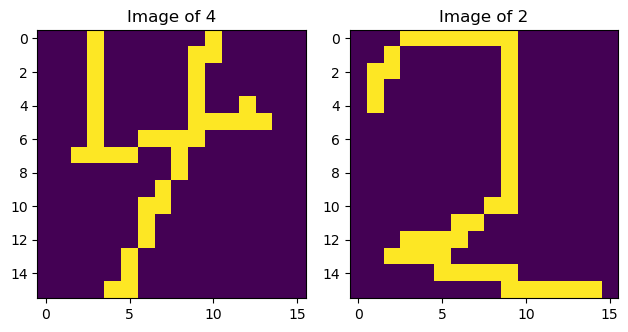

In [2]:
img2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

img4=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

img = np.reshape(img4,(16,16),order= 'F')
img1 = np.reshape(img2,(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[0].set_title('Image of 4')
axes[1].imshow(img1)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

## Import Data from the Files

#### Training Data

In [3]:
#Your code here
#load data
with open("trainX.txt", "r") as file:
    data = file.read()

# Split the data into rows
rows = data.strip().split('\n')

# Initialize an empty numpy array
X_train = np.zeros((len(rows), len(rows[0].split())))

# Fill the array with data
for i, row in enumerate(rows):
    values = row.split()
    X_train[i] = values

with open("trainY.txt", "r") as file:
    data = file.read()

# Split the data into individual values
values = data.strip().split()

# Convert values to integers
y_train = np.array(values, dtype=int)

# Reshape y_train
y_train = np.reshape(y_train, (len(values),))

# Print the dimensions
print("Shape of X_train :",X_train.shape)
print(f"Shape of y_train :",y_train.shape)

samplePoints = X_train.shape[0]

Shape of X_train : (500, 256)
Shape of y_train : (500,)


Expected Output <br>
- Shape of X_train : (500, 256) <br>
- Shape of y_train : (500,)

### Testing Data

In [4]:
#Your code here
#load data
with open("testX.txt", "r") as file:
    data = file.read()

# Split the data into rows
rows = data.strip().split('\n')

# Initialize an empty numpy array
X_test = np.zeros((len(rows), len(rows[0].split())))

# Fill the array with data
for i, row in enumerate(rows):
    values = row.split()
    X_test[i] = values

with open("testY.txt", "r") as file:
    data = file.read()

# Split the data into individual values
values = data.strip().split()

# Convert values to integers
y_test = np.array(values, dtype=int)

# Reshape y_train
y_test = np.reshape(y_test, (len(values),))

# Print the dimensions
print("Shape of X_test :",X_test.shape)
print(f"Shape of y_test :",y_test.shape)

Shape of X_test : (100, 256)
Shape of y_test : (100,)


Expected Output <br>
- Shape of X_train : (100, 256) <br>
- Shape of y_train : (100,)


### Dividing Data W.R.T its Classes

##### Training Data

In [5]:
#AS we know first 250 images are of 2 so we will take first 250 images from X_train
#your code here
X_train = np.loadtxt("trainX.txt")

# Extract the first 250 images of digit '2'
img2_X_train = X_train[:250]
img4_X_train = X_train[250:500]

##### Another way
You can coment the below code if you dont want to try this effective way and will use the above code to divide the data into classes

In [6]:
#But in case if we didn't know that first 250 images are of 2 then we can use this code
#This img2_X_train will contain only only those images from X_train which have corespondong label of 2 in Y_train
# Find the indices of images with label '2'
img2_X_train = X_train[np.where(y_train == 2)[0]]
img4_X_train = X_train[np.where(y_train == 4)[0]]
print("Shape of X_train :",img2_X_train.shape)
print("Shape of y_train :",img4_X_train.shape)

Shape of X_train : (250, 256)
Shape of y_train : (250, 256)


Expected Output <br>
- Shape of X_train : (250, 256) <br>
- Shape of y_train : (250, 256)


##### Testing Data

In [7]:
# Your code here
X_test = np.loadtxt("testX.txt")
img2_X_test = X_test[np.where(y_test == 2)[0]]
img4_X_test = X_test[np.where(y_test == 4)[0]]
print("Shape of X_train :",img2_X_test.shape)
print("Shape of y_train :",img4_X_test.shape)
sPoints = X_test.shape[0]

Shape of X_train : (50, 256)
Shape of y_train : (50, 256)


Expected Output <br>
- Shape of X_train : (50, 256) <br>
- Shape of y_train : (50, 256)


### Finding the Probabilities

### Training Data

##### Probabailty of 1s and 0s

In [8]:
#computing number of ones in img2_array
img2_one_count = np.sum(img2_X_train, axis=0)

#computing number of zeros in img2_array by subtracting number of one from total number of rows
img2_zero_count = img2_X_train.shape[0] - img2_one_count

#computing number of ones in img4_array
img4_one_count = np.sum(img4_X_train, axis=0)

#computing number of ones in img4_array
img4_zero_count = img4_X_train.shape[0] - img4_one_count

#computing probability of 1|2
img2_one_prob = img2_one_count/img2_X_train.shape[0]

#computing probability of 0|2
img2_zero_prob = img2_zero_count/img2_X_train.shape[0]

#computing probability of 1|4
img4_one_prob = img4_one_count/img4_X_train.shape[0]

#computing probability of 0|2
img4_zero_prob = img4_zero_count/img4_X_train.shape[0]

print(img2_one_prob.shape)
print(img2_zero_prob.shape)
print(img4_one_prob.shape)
print(img4_zero_prob.shape)

(256,)
(256,)
(256,)
(256,)


Expected Output <br>
- (256,)
- (256,)
- (256,)
- (256,)


#### Class Probabilities

In [9]:
# Your code here

def apply_naive_bayes(testData, img2_prob_one, img2_prob_zero,img4_prob_one,img4_prob_zero, img2, img4,samplePoints):
    # compute number of features
    num_features = len(img2_one_prob)
    
    # compute probability of 2
    prob_2 = img2.shape[0]/samplePoints
    
    # compute probability of 4
    prob_4 = img4.shape[0]/samplePoints
    
    # compute Class Probabilities
    class_probabilities = np.empty((0, 2))

    for instance in testData:
        # Initialize with the prior probability of class 2
        class2_prob = 1
        
        # Initialize with the prior probability of class 0
        class4_prob = 1  

        # applying baye's rule
        for i in range(num_features):
            if instance[i] == 1:
                class2_prob *= img2_prob_one[i]
                class4_prob *= img4_prob_one[i]
            else:
                class2_prob *= img2_prob_zero[i]
                class4_prob *= img4_prob_zero[i]
                
        class2_prob*=prob_2
        class4_prob*=prob_4
        class_probabilities = np.vstack([class_probabilities, [class2_prob, class4_prob]])
    return class_probabilities

#### Predictions

In [10]:
# # Your code here

def predictions(classProb):
    
    class_predictions=[]
    for instance in classProb:

        # placing predictions
        if instance[0] >= instance[1]:
            class_predictions.append(2)
        else:
            class_predictions.append(4)
    return class_predictions


#### Overall Accuracy

In [11]:
# Your code here

def calculate_confusion_matrix(predic, actual_labels):
    TP = 0  # True Positives
    FP = 0  # False Positives
    FN = 0  # False Negatives
    TN = 0  # True Negatives

    # Iterate over the predicted and actual labels
    for pred, actual in zip(predic, actual_labels):
        if pred == 2 and actual == 2:
            TP += 1  # Increment TP when prediction and actual are both positive (Class 2)
        elif pred == 2 and actual == 4:
            FP += 1  # Increment FP when prediction is positive (Class 2) but actual is negative (Class 4)
        elif pred == 4 and actual == 2:
            FN += 1  # Increment FN when prediction is negative (Class 4) but actual is positive (Class 2)
        elif pred == 4 and actual == 4:
            TN += 1  # Increment TN when prediction and actual are both negative (Class 4)

    return TP, FP, FN, TN
# calling apply_naive_bayes
classProb = apply_naive_bayes(X_train, img2_one_prob, img2_zero_prob, img4_one_prob, img4_zero_prob, img2_X_train, img4_X_train, samplePoints)

# Calculate TP, FP, FN, TN using the predictions and actual labels
TP, FP, FN, TN = calculate_confusion_matrix(predictions(classProb), y_train)

# Print the confusion matrix
print("Confusion Matrix")
print("TP =", TP, "FP =", FP)
print("FN =", FN, "TN =", TN)

# compute overall acurracy
overall_Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("\nOverall Accuracy = ", overall_Accuracy)

Confusion Matrix
TP = 249 FP = 2
FN = 1 TN = 248

Overall Accuracy =  0.994


Expected Output 
<br><br>
**Confusion Matrix**
<br>
TP =  248 	FP =  4
<br>
FN =  2 	TN =  246
<br>
- Overall Accuracy =  0.988

#### Classwise Accuracy

In [12]:
# Your code here

# compute class2_train_total_accuracy
class2_train_total_accuracy = TP / (TP + FN)

# compute class4_train_total_accuracy
class4_train_total_accuracy = TN / (TN + FP)


print("Total accuracy of Training data given class 2: ", class2_train_total_accuracy)
print("Total accuracy of Training data given class 4: " , class4_train_total_accuracy)

Total accuracy of Training data given class 2:  0.996
Total accuracy of Training data given class 4:  0.992


Expected Output <br>

- Total accuracy of Training data given class 2:  0.984
<br>
- Total accuracy of Training data given class 4:  0.992

### FOR TESTING DATA

##### Probabailty of 1s and 0s

In [13]:
#computing number of ones in img2_array
img2_one_count = np.sum(img2_X_test, axis=0)

#computing number of zeros in img2_array by subtracting number of one from total number of rows
img2_zero_count = img2_X_test.shape[0] - img2_one_count

#computing number of ones in img4_array
img4_one_count = np.sum(img4_X_test, axis=0)

#computing number of ones in img4_array
img4_zero_count = img4_X_test.shape[0] - img4_one_count

#computing probability of 1|2
img2_one_prob = img2_one_count/img2_X_test.shape[0]

#computing probability of 0|2
img2_zero_prob = img2_zero_count/img2_X_test.shape[0]

#computing probability of 1|4
img4_one_prob = img4_one_count/img4_X_test.shape[0]

#computing probability of 0|2
img4_zero_prob = img4_zero_count/img4_X_test.shape[0]

print(img2_one_prob.shape)
print(img2_zero_prob.shape)
print(img4_one_prob.shape)
print(img4_zero_prob.shape)

(256,)
(256,)
(256,)
(256,)


#### Class Probabilities

In [14]:
# your code here
# Class Probabilities
classProb = apply_naive_bayes(X_test, img2_one_prob, img2_zero_prob, img4_one_prob, img4_zero_prob, img2_X_test, img4_X_test, sPoints)


#### Predictions

In [15]:
# your code here
# predictions
pre = predictions(classProb)


#### Classwise Accuracy

In [16]:
# your code here
# Calculate TP, FP, FN, TN using the predictions and actual labels
TP, FP, FN, TN = calculate_confusion_matrix(pre, y_test)

# compute class2_test_total_accuracy
class2_test_total_accuracy = TP / (TP + FN)

# compute class4_test_total_accuracy
class4_test_total_accuracy = TN / (TN + FP)

print("Total accuracy of Testing data given class 2: ", class2_test_total_accuracy)
print("Total accuracy of Testing data given class 4: ", class4_test_total_accuracy)

Total accuracy of Testing data given class 2:  1.0
Total accuracy of Testing data given class 4:  1.0


Expected Output <br>

- Total accuracy of Testing data given class 2:  1.0
<br>
- Total accuracy of Testing data given class 4:  1.0

#### Overall Accuracy

In [17]:
# your code here 

# Print the confusion matrix
print("Confusion Matrix")
print("TP =", TP, "FP =", FP)
print("FN =", FN, "TN =", TN)

# compute overall acurracy
overall_Accuracy = (TP+TN)/(TP+FP+FN+TN)
print("\nOverall Accuracy = ", overall_Accuracy)

Confusion Matrix
TP = 50 FP = 0
FN = 0 TN = 50

Overall Accuracy =  1.0


Expected Output 
<br><br>
**Confusion Matrix**
<br>
TP =  50 	FP =  0
<br>
FN =  0 	TN =  50
<br>
- Overall Accuracy =  1.0

### Plot your Test pixels/features in form of image to correctly identify whether our model is giving correct results

2 plots for each class

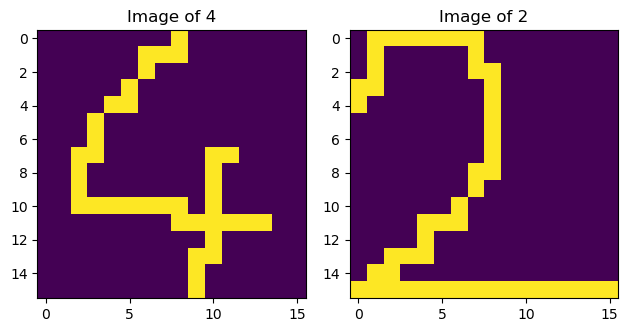

Right Prediction 2
Left Prediction 4


In [18]:
img = np.reshape(X_test[20],(16,16),order= 'F')
img1 = np.reshape(X_test[50],(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[0].set_title('Image of 4')
axes[1].imshow(img)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

# Prediction
print("Right Prediction",pre[20])
print("Left Prediction",pre[50])

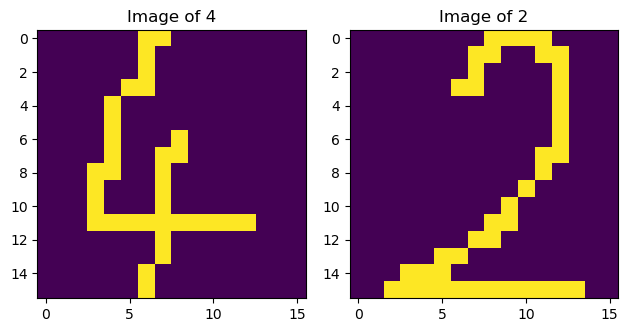

Right Prediction 2
Left Prediction 4


In [19]:
img = np.reshape(X_test[22],(16,16),order= 'F')
img1 = np.reshape(X_test[52],(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[0].set_title('Image of 4')
axes[1].imshow(img)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

# Prediction
print("Right Prediction",pre[22])
print("Left Prediction",pre[52])

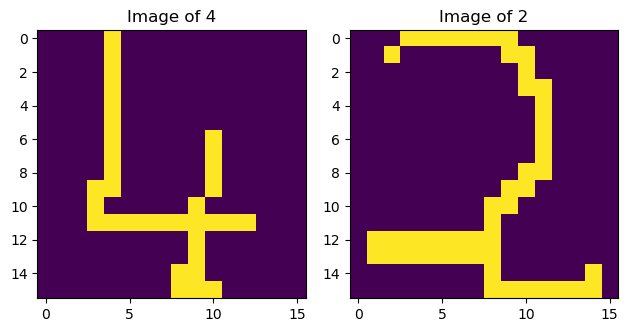

Right Prediction 2
Left Prediction 4


In [20]:
img = np.reshape(X_test[30],(16,16),order= 'F')
img1 = np.reshape(X_test[60],(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[0].set_title('Image of 4')
axes[1].imshow(img)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

# Prediction
print("Right Prediction",pre[30])
print("Left Prediction",pre[60])

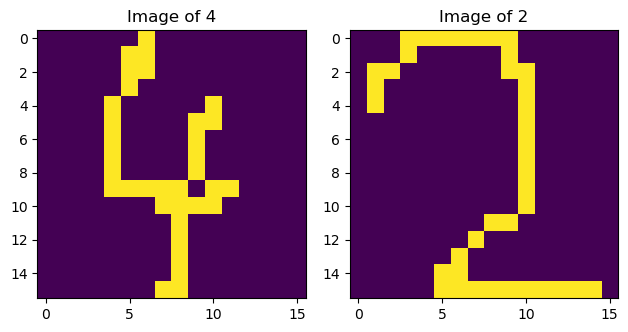

Right Prediction 2
Left Prediction 4


In [21]:
img = np.reshape(X_test[49],(16,16),order= 'F')
img1 = np.reshape(X_test[79],(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img1)
axes[0].set_title('Image of 4')
axes[1].imshow(img)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

# Prediction
print("Right Prediction",pre[49])
print("Left Prediction",pre[79])